<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Trabajo Practico</h3>
    <h5>Grupo 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Braian Drago <p>
        <p>Integrantes: Garnica Hernán - Scime Silvia
</div>

Importamos modulos a utilizar

In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pm

import warnings
warnings.filterwarnings('ignore')

####  Leemos los datos a trabajar


In [233]:
url='https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Kilometros_TP.csv'
raw_csv_data = pd.read_csv(url, sep=',', decimal='.')
df_km=raw_csv_data.copy()

#### Breve resumen del dataset


In [234]:
print(df_km.columns)

Index(['Fecha', 'KM'], dtype='object')


In [235]:
df_km.describe(include='all')

,Fecha,KM
count,761,761.000000
unique,761,NaN
top,2023-03-18,NaN
freq,1,NaN
mean,NaN,73506.130891
std,NaN,23975.028897
min,NaN,18.976000
25%,NaN,52063.096000
50%,NaN,75190.790000
75%,NaN,96904.004000


In [236]:
df_km.head(10)

,Fecha,KM
0,2023-03-18,66686.513
1,2023-05-09,105009.277
2,2023-02-28,80447.065
3,2023-03-06,103403.154
4,2023-03-10,102574.717
5,2023-05-11,104149.399
6,2023-03-21,102278.464
7,2023-04-24,103627.203
8,2023-04-18,103366.435
9,2023-05-31,103403.519


In [237]:
df_km.tail(10)

,Fecha,KM
751,2022-04-09,48305.086
752,2022-01-29,47482.883
753,2023-07-23,45117.943
754,2022-01-11,50103.326
755,2022-12-18,17554.422
756,2022-04-26,23536.646
757,2023-06-13,47.508
758,2022-10-12,49.673
759,2022-05-17,54.524
760,2022-10-13,18.976


Adaptamos el dataset para trabajarlo segun sus series temporales

In [238]:
df_km.Fecha = pd.to_datetime(df_km.Fecha, dayfirst = True)

In [239]:
df_km.Fecha.describe()

count                              761
mean     2022-10-15 04:07:53.061760768
min                2021-09-30 00:00:00
25%                2022-04-08 00:00:00
50%                2022-10-15 00:00:00
75%                2023-04-23 00:00:00
max                2023-10-31 00:00:00
Name: Fecha, dtype: object

Aplicamos filtro de 2 años de duración al campo Fecha (2021-10-01-2023-10-31)

In [240]:
df_km = df_km[(df_km['Fecha'] >= '2021-10-01') & (df_km['Fecha'] <= '2023-10-31')]
df_km = df_km.sort_values(by=['Fecha'], ascending=True)
df_km = df_km.reset_index(drop=True)

In [241]:
df_km.head(10)

,Fecha,KM
0,2021-10-01,73177.190
1,2021-10-02,49300.256
2,2021-10-03,34024.972
3,2021-10-04,73453.515
4,2021-10-05,73722.635
5,2021-10-06,73465.563
6,2021-10-07,49462.478
7,2021-10-08,35282.426
8,2021-10-09,48384.782
9,2021-10-10,34785.451


In [242]:
df_km.tail(10)

,Fecha,KM
750,2023-10-22,47321.881
751,2023-10-23,101572.556
752,2023-10-24,101884.237
753,2023-10-25,102691.406
754,2023-10-26,102253.728
755,2023-10-27,102590.551
756,2023-10-28,62622.827
757,2023-10-29,44060.420
758,2023-10-30,101843.308
759,2023-10-31,102381.640


Analisis de fechas duplicadas

In [243]:
# Detectar valores duplicados en la columna 'fecha'
fechas_duplicadas = df_km[df_km.duplicated(subset=['Fecha'])]

In [244]:
fechas_duplicadas

,Fecha,KM


In [245]:
from skimpy import skim

In [246]:
skim(df_km)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 760    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ KM              │   0 │      0 │   74000 │   24000 │  19 │   52000 │   75000 │   97000 │  110000 │  ▁▅▃▅▇  │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴─────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Fecha                  │      0 │         0 │     2021-10-01      │     2023-10-31      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Seteamos como index del dataset segun el dia

In [247]:
df_km.set_index("Fecha",inplace=True)

In [248]:
df_km.head()

,KM
Fecha,
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515
2021-10-05,73722.635


#### Adaptamos el datset a la frecuencia diaria

In [249]:
df_km=df_km.asfreq('d')
df_km

,KM
Fecha,
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515
2021-10-05,73722.635
...,...
2023-10-27,102590.551
2023-10-28,62622.827
2023-10-29,44060.420


Verificamos existencia de fechas nulas

In [250]:
df_km.isna().sum()

KM    1
dtype: int64

Obtenemos posición del registro con fecha nula

In [251]:
fila_con_na = df_km[df_km.isna().any(axis=1)]  #A REVISAR!!!
#df['KM']=df['KM'].fillna(method='ffill')

In [252]:
fila_con_na

,KM
Fecha,
2023-06-22,NaN


Este día no aparece en el dataset, lo borramos para poder seguir con el análisis.

In [253]:
#df_km=df_km.dropna()
df_km['KM']=df_km['KM'].fillna(method='ffill')

#index_to_replace = df_km.index[df_km['Fecha'] == '2023-06-22']
#average_value = (df_km.loc[index_to_replace - 7, 'KM'] + df_km.loc[index_to_replace + 7, 'KM']) / 2
#df_km.loc[index_to_replace, 'KM'] = average_value

Volvemos a verificar existencia de fechas nulas

In [254]:
df_km.isna().sum()

KM    0
dtype: int64

In [255]:
df_km[df_km['KM'] < 100].count()



KM    4
dtype: int64

## Punto 2

Visualizamos el dataset teniendo en cuenta la serie temporal

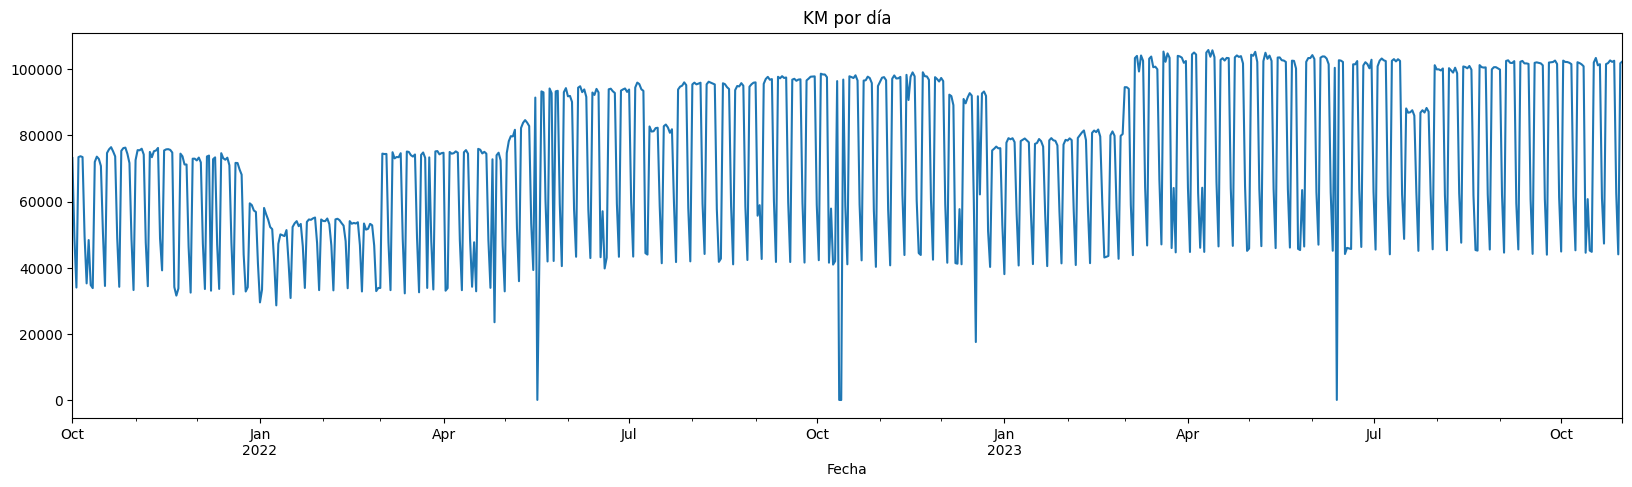

In [256]:
df_km.KM.plot(figsize=(20,5), title = "KM por día")
plt.show()

Observación

El gráfico hace referencia a los kms diarios recorridos por las líneas Urbanas en la ciudad de Buenos Aires. Es la primer visualización de la serie de tiempo y se aprecian algunos valores iguales a 0 kms recorridos en determinadas fechas. Habrá que seguir estudiando a fin de decidir qué pasa con esos datos y el tratamiento pertinente de los mismos. 

<Axes: ylabel='KM'>

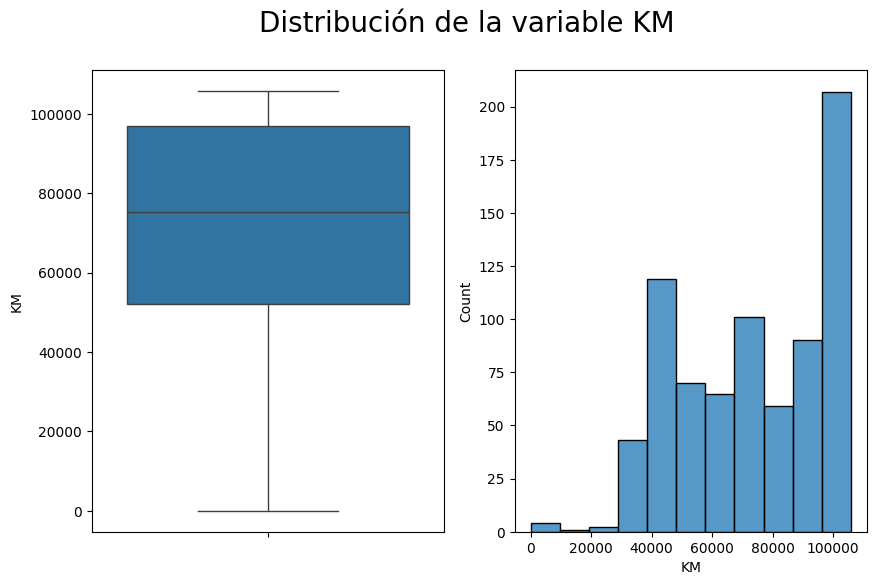

In [257]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de la variable KM', fontsize = 20)


sns.histplot(data = df_km, x="KM", ax = axs[1])
sns.boxplot(y = "KM", data = df_km, ax = axs[0])


La variable parece no seguir una distribución en particular, los kms recorridos por día se encuentran entre 50.000 y 100.000,
siendo este último valor el más frecuente.

Descomposición de Series Temporales

In [258]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

Descomposicion Aditiva

In [259]:
df_km = df_km.asfreq('d')
df_km = df_km.fillna(1)

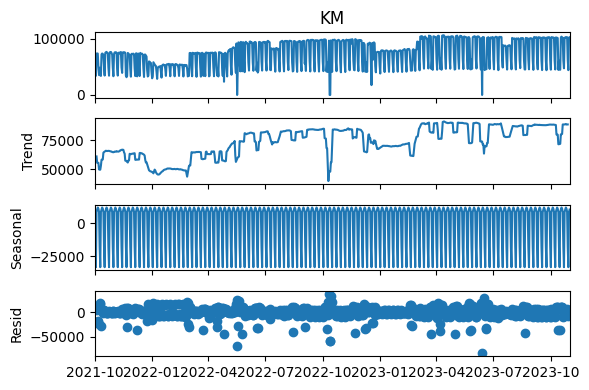

In [260]:
s_dec_additive = seasonal_decompose(df_km.KM, model = "adittive")
s_dec_additive.plot()
plt.show()

Al hacer la descomposición de la serie se pueden observar 4 características:
- El ciclo
- La tendencia   
- La estacionalidad.
- Movimientos irregulares ( el error )

Descomposicion Multiplicativa

In [261]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

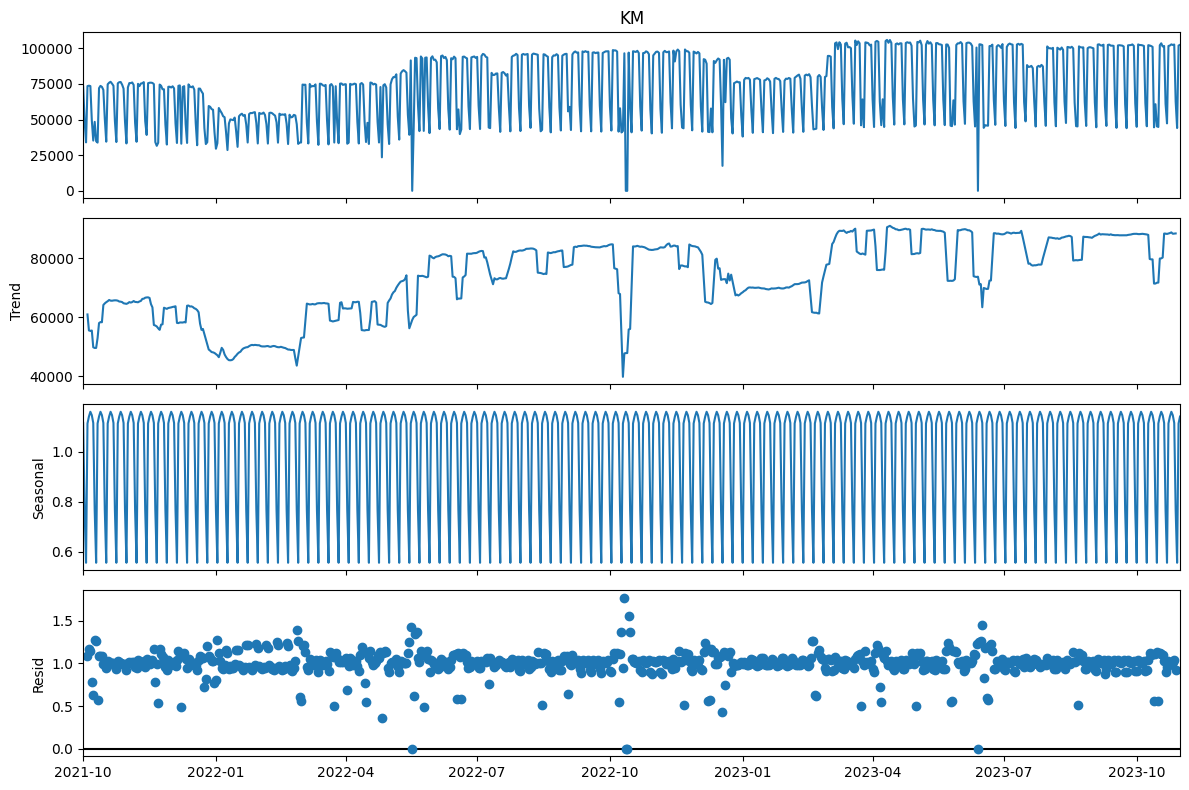

In [262]:
s_dec_multiplicative = seasonal_decompose(df_km.KM, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

Se observa una marcada estacionalidad.

Representación gráfica de la Función de Autocorrelación

In [263]:
# Módulos a utilizar
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [264]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

Grafico ACF de los KM

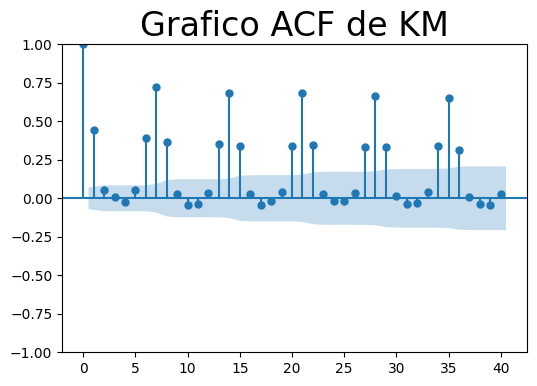

In [265]:
plot_acf(df_km.KM,lags=40)
plt.title("Grafico ACF de KM", size= 24)
plt.show()

Observaciones

El grafico de autocorrelación nos da una primera aproximación de no estacionariedad dado a que se presentan muchos valores por fuera del intervalo de confianza. Tampoco no se alcanza a percibir un decrecimiento lineal con tendencia a bajar en el tiempo.
Por lo tanto se necesita aplicar un metodo de transformación para conseguir la misma.

Ahora vamos a calcular cuantas transformaciones se necesitan.

In [266]:
print(pm.arima.ndiffs(df_km.KM))

1


Aplicamos transformación de la serie para lograr estacionariedad

In [269]:
# Diferencia de la serie con periodo 1
km_diff_1= df_km.copy()
km_diff_1=km_diff_1.diff(axis = 0, periods = 1)
km_diff_1.drop(['2021-10-01'], inplace=True)

In [270]:
# Diferencia de la serie con periodo 1
km_diff_7= df_km.copy()
km_diff_7=km_diff_1.diff(axis = 0, periods = 7)
km_diff_7.dropna(inplace = True)

In [62]:
km_diff_1.head(10)

,KM,wn
Fecha,,
2021-10-02,-23876.934,13339.179044
2021-10-03,-15275.284,21733.265279
2021-10-04,39428.543,-13129.873379
2021-10-05,269.120,4706.235305
2021-10-06,-257.072,-61112.393243
2021-10-07,-24003.085,42098.699147
2021-10-08,-14180.052,15688.335879
2021-10-09,13102.356,-43646.237831
2021-10-10,-13599.331,33017.774773


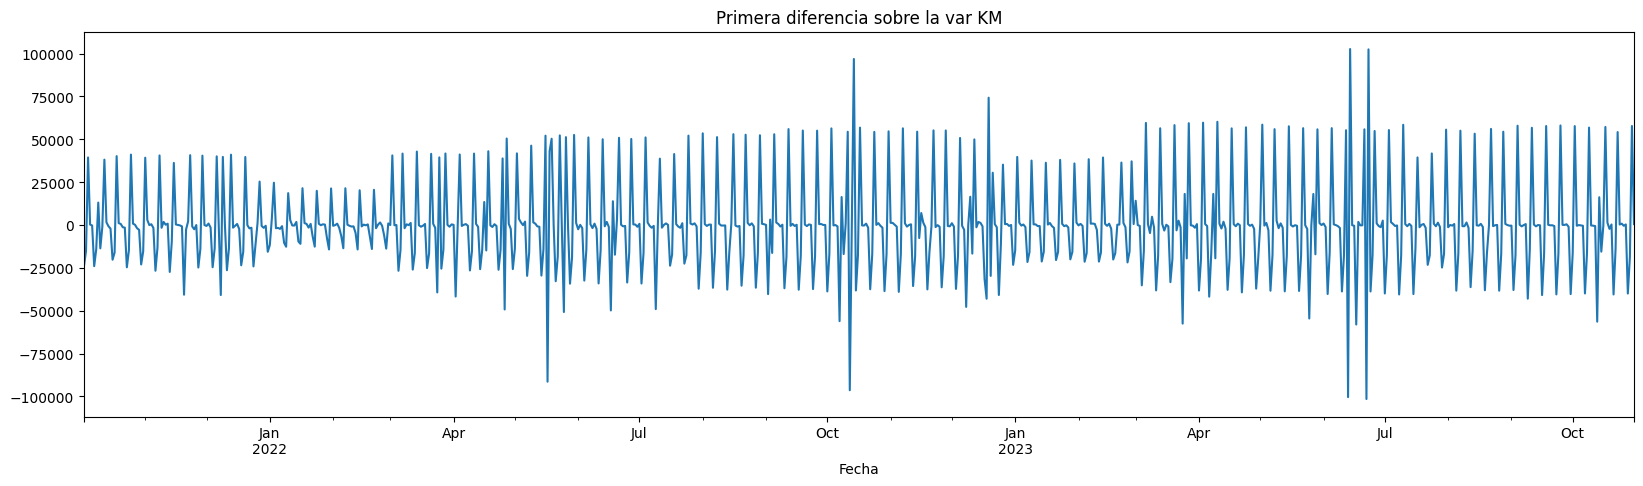

In [63]:
#grafico este indice con las diferencias aplicadas fila a fila
km_diff_1.KM.plot(figsize=(20,5), title = "Primera diferencia sobre la var KM")
plt.show()

Observaciones

La grafica de la primera diferencia de la serie original muestra característica de Ruido blanco que son;
la reversión a la media con un valor constante esperado igual a cero y volatilidad constante en el tiempo.

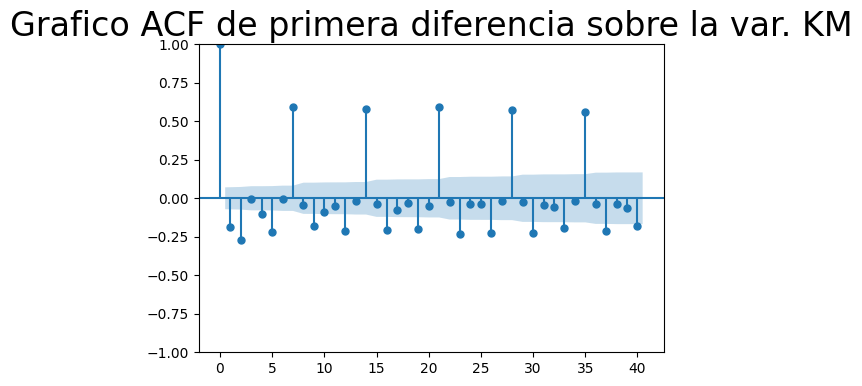

In [38]:
plot_acf(km_diff_1.KM,lags=40)
plt.title("Grafico ACF de primera diferencia sobre la var. KM", size= 24)
plt.show()

Observación

Vemos en la función de autocorrelación de la primera diferencia de la serie original un cambio no tan marcado respecto a la grafica de ACF de la serie original.

Ruido Blanco

In [39]:
wn = np.random.normal(loc = df_km.KM.mean(), scale = df_km.KM.std(), size = len(df_km))
df_km['wn'] = wn
df_km.describe()

,KM,wn
count,761.000000,761.000000
mean,73410.293046,74149.299190
std,24122.636640,24503.665931
min,1.000000,1342.195911
25%,51774.760000,57013.456970
50%,75190.790000,73801.723397
75%,96904.004000,90169.856086
max,105834.661000,163685.450301


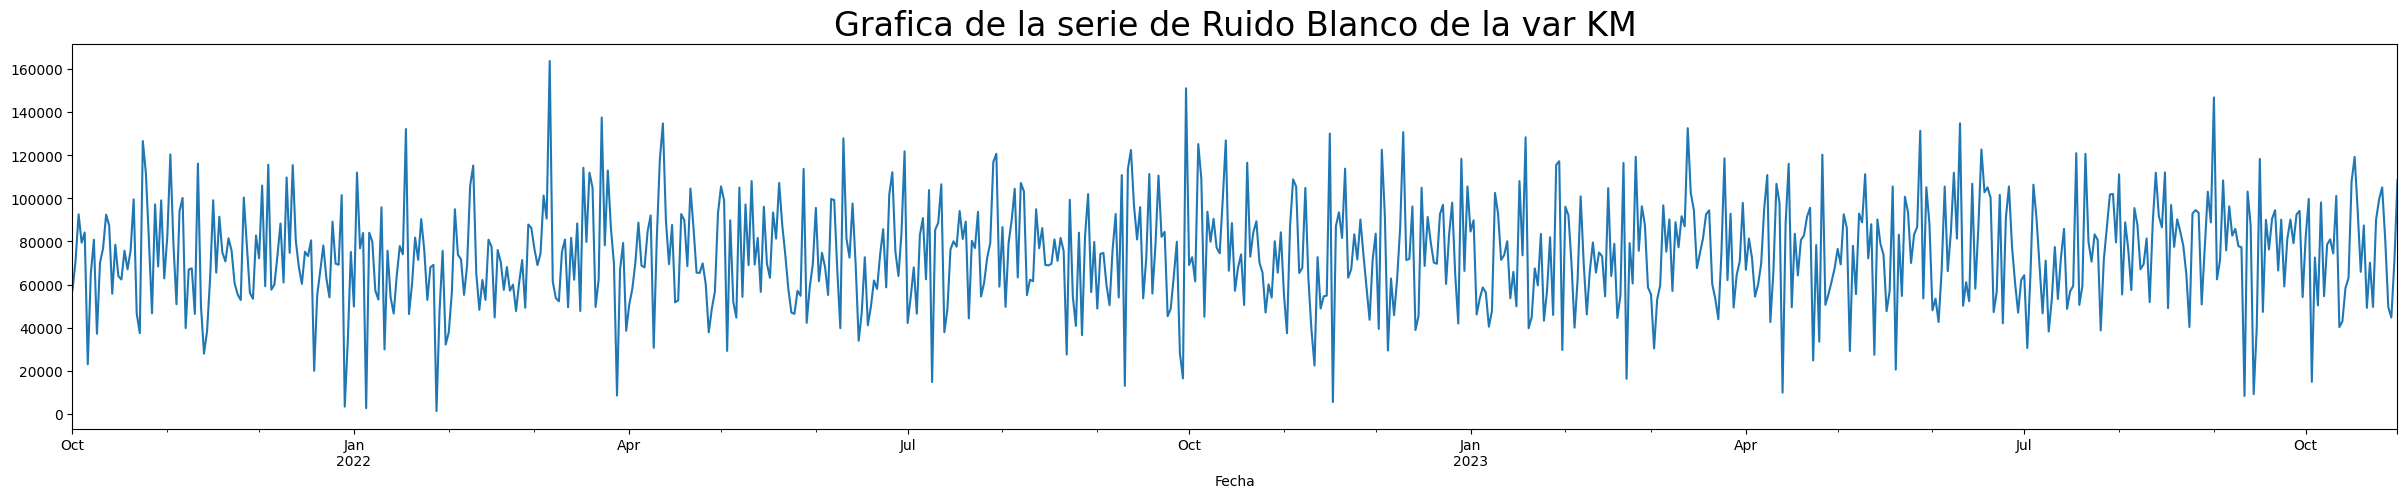

In [40]:
df_km.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie de Ruido Blanco de la var KM", size= 24)
plt.show()

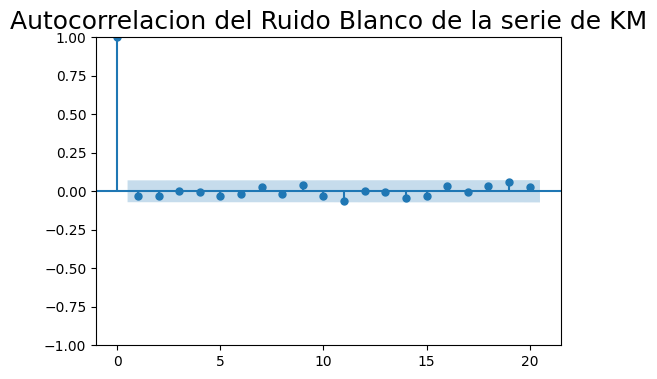

In [41]:
plot_acf(df_km.wn, lags=20)
plt.title("Autocorrelacion del Ruido Blanco de la serie de KM", size= 18)
plt.show()

## Punto 3
Graficas de FAS, FAC y FACP

In [271]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as tsa

In [272]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2,figsize=(18,10),sharex=True, sharey=False )
  axes[2,0].set_xlabel('Lag')
  axes[2,1].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie KM')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')

  plot_acf(serie_nr, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie KM diferenciado')
  plot_pacf(serie_nr, lags=nrol, ax= axes[1,1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,1].plot(tsa.acovf(serie_nr,fft=False, nlag=nrol), color='r', label='AutoCov')

  p1.legend()
  plt.show()

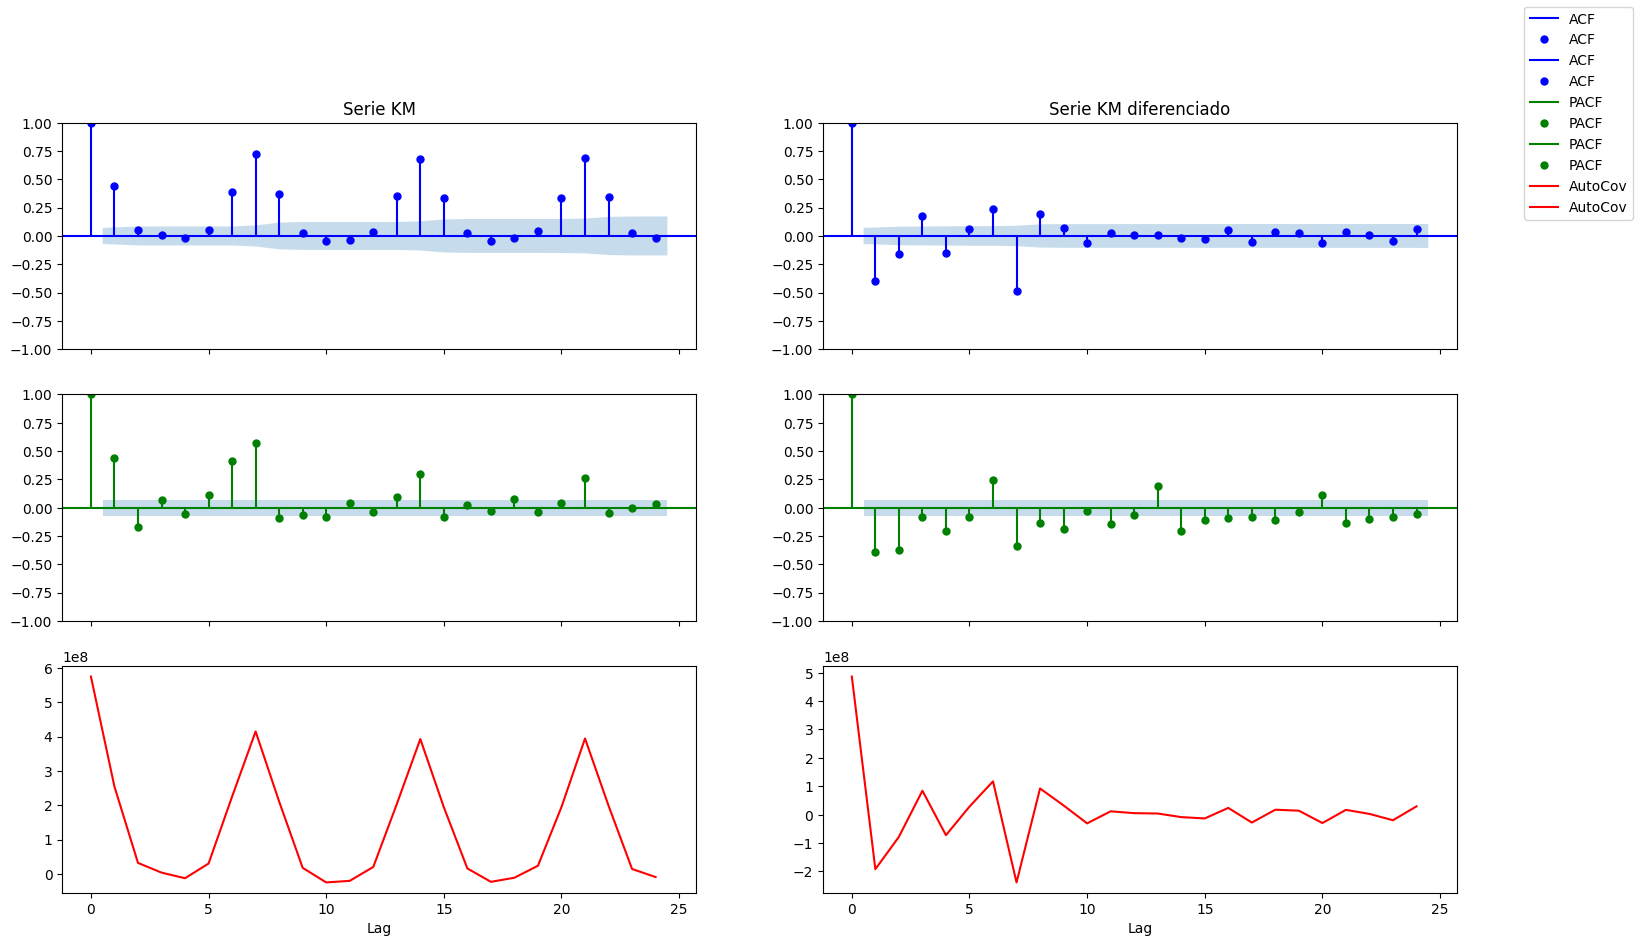

In [273]:
autocov_autocorr(df_km.KM, km_diff_7.KM, nrol= 24 )

# Pregunta 4

Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias.

In [44]:
from statsmodels.tsa.stattools import adfuller

In [45]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

In [47]:
# Aplicamos Dicky Fuller
Augmented_Dickey_Fuller_Test_func(df_km.KM,'KM')

Results of Dickey-Fuller Test for column: KM
Test Statistic                  -1.892315
p-value                          0.335685
No Lags Used                    20.000000
Number of Observations Used    740.000000
Critical Value (1%)             -3.439218
Critical Value (5%)             -2.865454
Critical Value (10%)            -2.568854
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [50]:
# Dicky Fuller de la Serie diferenciada
Augmented_Dickey_Fuller_Test_func(km_diff_1.KM ,'KM')

Results of Dickey-Fuller Test for column: KM


Test Statistic                -1.158072e+01
p-value                        2.947555e-21
No Lags Used                   1.900000e+01
Number of Observations Used    7.400000e+02
Critical Value (1%)           -3.439218e+00
Critical Value (5%)           -2.865454e+00
Critical Value (10%)          -2.568854e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


In [274]:
# Dicky Fuller de la Serie diferenciada
Augmented_Dickey_Fuller_Test_func(km_diff_7.KM ,'KM')

Results of Dickey-Fuller Test for column: KM
Test Statistic                -1.099957e+01
p-value                        6.735422e-20
No Lags Used                   2.000000e+01
Number of Observations Used    7.320000e+02
Critical Value (1%)           -3.439315e+00
Critical Value (5%)           -2.865497e+00
Critical Value (10%)          -2.568877e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


## Punto 5

Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual global de los parámetros del modelo).

In [277]:
# Separacion Train/Test
# Seleccionamos el primer 80% para train
train = df_km.iloc[:round(len(df_km)*.80)]

# Seleccionamos el 20% restante para test
test = df_km.iloc[round(len(df_km)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train, test)

                    KM
Fecha                 
2021-10-01   73177.190
2021-10-02   49300.256
2021-10-03   34024.972
2021-10-04   73453.515
2021-10-05   73722.635
...                ...
2023-05-28   46429.980
2023-05-29  102266.295
2023-05-30  103408.078
2023-05-31  103403.519
2023-06-01  104291.072

[609 rows x 1 columns]                     KM
Fecha                 
2023-06-02  103121.540
2023-06-03   62877.695
2023-06-04   46983.239
2023-06-05  103512.439
2023-06-06  103902.764
...                ...
2023-10-27  102590.551
2023-10-28   62622.827
2023-10-29   44060.420
2023-10-30  101843.308
2023-10-31  102381.640

[152 rows x 1 columns]


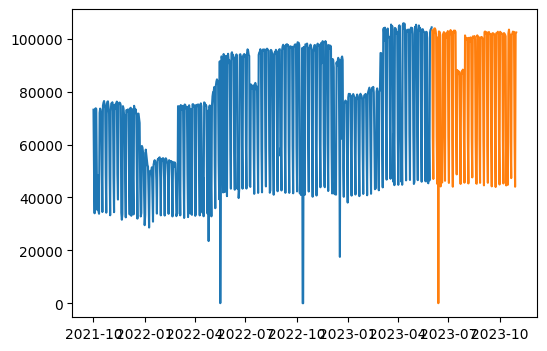

In [278]:
# Visualización Train - Test

plt.plot(train)
plt.plot(test)

In [279]:
from pmdarima.arima import auto_arima, ndiffs, nsdiffs

In [280]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA

auto_arima(train, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic


 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=14007.322, Time=0.22 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=13750.885, Time=1.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=13734.959, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=14005.325, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=13852.138, Time=1.64 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=13439.723, Time=8.24 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=13535.799, Time=4.86 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=inf, Time=7.57 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=6.61 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=13698.958, Time=1.49 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=13632.922, Time=1.38 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=15.24 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=4.11 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=13556.795, Time=4.95 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=13401.731, Time=6.30 sec
 ARIMA(0,1,2)(0,0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  609
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -6666.351
Date:                             Wed, 29 Nov 2023   AIC                          13348.702
Time:                                     23:10:06   BIC                          13383.983
Sample:                                 10-01-2021   HQIC                         13362.428
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4457      4.483      0.099      0.921      -8.342       9.233
ar.L1         -0.3655      0.256     -1.427      0.153      -0.867       0.136
ar.L2          0.0979      0.122      0.801      0.423      -0.142       0.337
ma.L1         -0.2485      0.266     -0.933      0.351      -0.770       0.273
ma.L2         -0.6452      0.268     -2.409      0.016      -1.170      -0.120
ar.S.L7        0.9942      0.008    121.058      0.000       0.978       1.010
ma.S.L7       -0.9184      0.046    -19.781      0.000      -1.009      -0.827
sigma2      2.915e+08   4.09e-07   7.12e+14      0.000    2.91e+08    2.91e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3168.14
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -2.26
Prob(H) (two-sided):                  0.01   Kurtosis:                        13.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.54e+31. Standard errors may be unstable.
"""

In [281]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [282]:
modelo_sarima = SARIMAX(train, order=(4,1,2), seasonal_order=(1,0,1,7))
modelo_sarima = modelo_sarima.fit()
print(modelo_sarima.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                  KM   No. Observations:                  609
Model:             SARIMAX(4, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -6642.691
Date:                             Wed, 29 Nov 2023   AIC                          13303.383
Time:                                     23:10:31   BIC                          13343.074
Sample:                                 10-01-2021   HQIC                         13318.825
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0226      0.453     -0.050      0.960      -0.910       0.865
ar.L2         -0.0067      